In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report



In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(df.shape)
df.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory data analysis

In [3]:
df1=df[df["DEATH_EVENT"]==0]

In [4]:
df2=df[df["DEATH_EVENT"]==1]

In [5]:
features=df.columns[:-1]

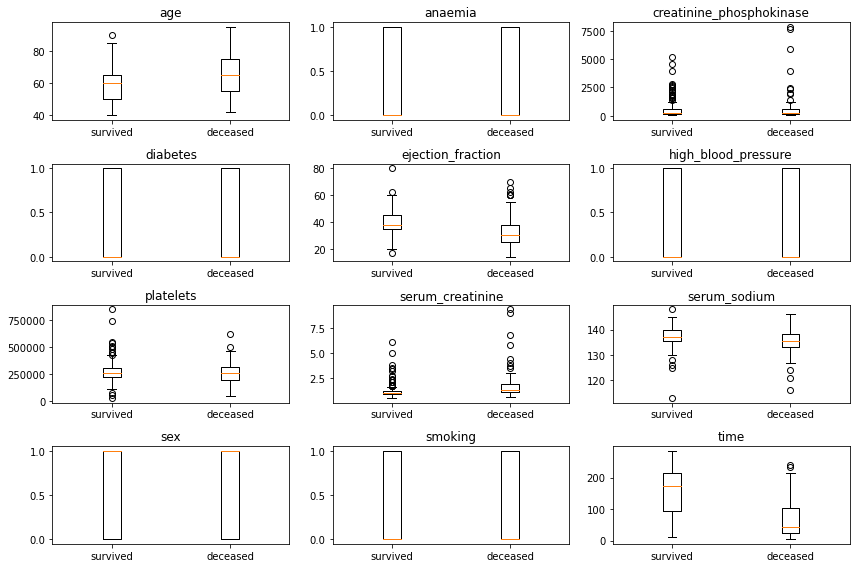

In [6]:
fig, axs= plt.subplots(4,3, figsize=(12,8))


for i in range(4):
    for j in range(3):
        k= 3*i+j
        if k>=12: continue

        feet= features[k]
        
        ax= axs[i,j]
        ax.boxplot([df1[feet], df2[feet]]);
        ax.set_title(feet)
        ax.set_xticklabels(['survived', 'deceased'])
plt.subplots_adjust(wspace=.25)
plt.tight_layout()

In [7]:
attributes=df.columns[:-1]

In [8]:
for c in attributes:
    corr= np.corrcoef(df[c], df["DEATH_EVENT"])[0][1]
    print(c + ": ", corr)

age:  0.2537285430880035
anaemia:  0.06627009846028778
creatinine_phosphokinase:  0.06272816025237475
diabetes:  -0.0019428833442034674
ejection_fraction:  -0.26860331239406177
high_blood_pressure:  0.07935105769128531
platelets:  -0.04913886798037429
serum_creatinine:  0.29427756098414926
serum_sodium:  -0.195203596416401
sex:  -0.004316376319703094
smoking:  -0.012623152709359603
time:  -0.5269637792775768


# Age and serum_creatinine are more correlated 

In [9]:
df[df["DEATH_EVENT"]==1]["age"].value_counts().head()

60.0    13
65.0     8
50.0     8
70.0     7
75.0     6
Name: age, dtype: int64

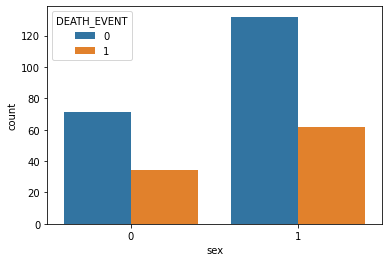

In [10]:
sns.countplot(x="sex", hue="DEATH_EVENT", data=df);

In [11]:
scaled_data= MinMaxScaler().fit_transform(df.drop("DEATH_EVENT", axis=1))

In [12]:
df1=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [13]:
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


# Loogistic regression

In [14]:
X= df1

In [15]:
y=df["DEATH_EVENT"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [17]:
model= LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
model.score(X_train, y_train)

0.8493723849372385

In [20]:
l_pred=model.predict(X_test)

In [21]:


print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.82      0.43      0.56        21

    accuracy                           0.77        60
   macro avg       0.79      0.69      0.70        60
weighted avg       0.78      0.77      0.74        60



# KNN

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [23]:
model2= KNeighborsClassifier(n_neighbors=2)

In [24]:
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
model2.score(X_train, y_train)

0.8075313807531381

In [26]:
k_pred=model2.predict(X_test)

In [27]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        39
           1       1.00      0.10      0.17        21

    accuracy                           0.68        60
   macro avg       0.84      0.55      0.49        60
weighted avg       0.79      0.68      0.58        60



# Parameter tunning

In [28]:
sse=[]

for i in range(1,40):
    model2= KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train, y_train)
    k_pred=model2.predict(X_test)
    sse.append(np.mean(k_pred!= y_test))

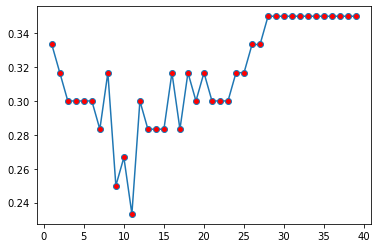

In [29]:
plt.plot(range(1,40), sse, marker="o", markerfacecolor="red")

In [30]:
model2= KNeighborsClassifier(n_neighbors=11)
model2.fit(X_train, y_train)
k_pred=model2.predict(X_test)

In [31]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       1.00      0.33      0.50        21

    accuracy                           0.77        60
   macro avg       0.87      0.67      0.67        60
weighted avg       0.83      0.77      0.73        60



# Decision Tree

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [33]:
model3=DecisionTreeClassifier()

In [34]:
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
model3.score(X_train, y_train)

1.0

In [36]:
d_pred= model3.predict(X_test)

In [37]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.60      0.43      0.50        21

    accuracy                           0.70        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.69      0.70      0.69        60



# Random forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
model4=RandomForestClassifier(n_estimators=100, max_depth=10)

In [40]:
model4.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [41]:
model4.score(X_train, y_train)

1.0

In [42]:
f_pred=model4.predict(X_test)

In [43]:
print(classification_report(y_test, f_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        39
           1       0.80      0.57      0.67        21

    accuracy                           0.80        60
   macro avg       0.80      0.75      0.76        60
weighted avg       0.80      0.80      0.79        60



# Support vector machine

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
model5=SVC()

In [46]:
model5.fit(X_train, y_train)

SVC()

In [47]:
model5.score(X_train, y_train)

0.8702928870292888

In [48]:
s_pred=model5.predict(X_test)

In [49]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.82      0.43      0.56        21

    accuracy                           0.77        60
   macro avg       0.79      0.69      0.70        60
weighted avg       0.78      0.77      0.74        60



# hyper parameter tunning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={"C":[1,10,100,100], "gamma":[0.1,0.01,0.001,0.0001]}

In [52]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [53]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END .....................................C=1, gamma=0.1; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [54]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [55]:
model5=SVC(C=100, gamma=0.001)
model5.fit(X_train, y_train)
s_pred=model5.predict(X_test)

In [56]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.38      0.55        21

    accuracy                           0.78        60
   macro avg       0.88      0.69      0.70        60
weighted avg       0.84      0.78      0.75        60



# Naive-bayes

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [58]:
model6=GaussianNB()

In [59]:
model6.fit(X_train, y_train)

GaussianNB()

In [60]:
model6.score(X_train, y_train)

0.799163179916318

In [61]:
g_pred=model6.predict(X_test)

In [62]:
print(classification_report(y_test, g_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.60      0.43      0.50        21

    accuracy                           0.70        60
   macro avg       0.67      0.64      0.64        60
weighted avg       0.69      0.70      0.69        60



# from my observation Random forest did better than all the algprithms because it has better recall score than the rest, all the remaining did okay but has bad recall score